In [ ]:
import numpy as np
np.random.seed(7)
x = np.array([0,1,2,3,4])
y = x * 2 + 1
train_data = x[:2]
train_labels = y[:2]
test_data = x[2:]
test_labels = y[2:]

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(1, input_shape = (1,)))
model.compile(optimizer = 'SGD',
              loss = 'mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_data,
                    train_labels,
                    epochs = 300,
                    verbose = 0,
                    validation_data = (test_data, test_labels))
print('Targets:', test_labels)
print('Predictions:', model.predict(test_data).flatten())

Targets: [5 7 9]
Predictions: [4.5963287 6.3047776 8.013226 ]


<function matplotlib.pyplot.show>

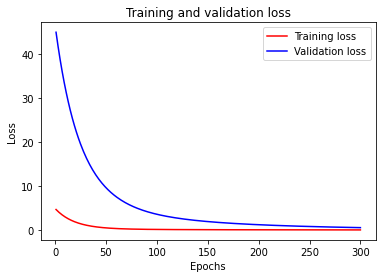

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

In [ ]:
model2 = Sequential()
model2.add(Dense(16, activation = 'relu', input_shape = (1,)))
model2.add(Dense(8, activation = 'relu'))
model2.add(Dense(1))
model2.compile(optimizer = 'SGD',
               loss = 'mse')
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2 = model2.fit(train_data,
                       train_labels,
                       epochs = 600,
                       verbose = 0,
                       validation_data = (test_data, test_labels))
print('Targets:', test_labels)
print('Predictions:', model2.predict(test_data).flatten())

Targets: [5 7 9]
Predictions: [4.9233685 6.832516  8.741663 ]


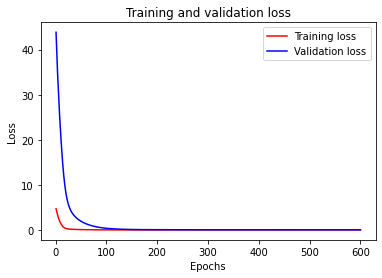

In [ ]:
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
epochs = range(1, len(loss2) + 1)

plt.plot(epochs, loss2, 'r', label = 'Training loss')
plt.plot(epochs, val_loss2, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
new_x = np.array([5,6,7,8,9])
new_y = new_x * 2 + 1

print('Targets:', new_y)
print('Predictions:', model2.predict(new_x).flatten())

Targets: [11 13 15 17 19]
Predictions: [10.65081  12.559957 14.469105 16.37825  18.287397]


In [ ]:
from tensorflow import keras
import numpy as np
seed = 7
np.random.seed(seed)

from sklearn.datasets import load_iris
iris = load_iris()
x = iris['data']
y = iris['target']
print(x[:3])
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
from keras.utils import to_categorical

#학습 레이블(0,1,2)을 원-핫 인코딩
y = to_categorical(y)

print(y[:3])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(x)

print(x_scaled[:3])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled,
                                                    y,
                                                    test_size = 0.5,
                                                    random_state = 2)
n_features = x.shape[1] #4
n_classes = y.shape[1] #3

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model1 = Sequential()
model1.add(Dense(8, activation = 'relu', input_dim = n_features))
model1.add(Dense(n_classes, activation = 'softmax'))

model1.compile(loss = 'categorical_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_dict = {}

history1 = model1.fit(x_train, y_train,
                     batch_size = 5, epochs = 50, verbose = 0,
                     validation_data = (x_test, y_test))

In [ ]:
score = model1.evaluate(x_test, y_test, verbose = 0)
print('검증 데이터 손실값:', score[0])
print('검증 데이터 정확도:', score[1])

history_dict[model1.name] = [history1, model1]

검증 데이터 손실값: 0.2799298167228699
검증 데이터 정확도: 0.9466666579246521


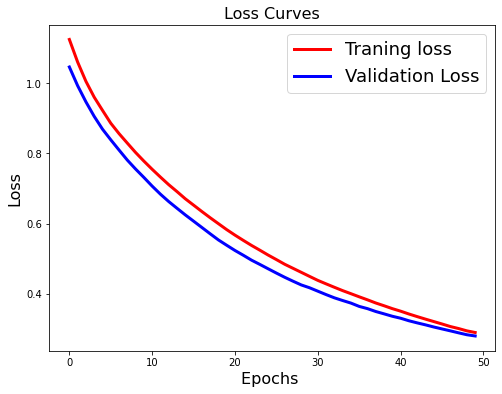

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
def loss_graph(history):

  plt.figure(figsize = [8,6])
  plt.plot(history.history['loss'], 'r', linewidth = 3.0)
  plt.plot(history.history['val_loss'], 'b', linewidth = 3.0)
  plt.legend(['Traning loss', 'Validation Loss'], fontsize = 18)
  plt.xlabel('Epochs ', fontsize = 16)
  plt.ylabel('Loss', fontsize = 16)
  plt.title('Loss Curves', fontsize = 16)
loss_graph(history1)

In [ ]:
model2 = Sequential()
model2.add(Dense(16, activation = 'relu', input_dim = n_features))
model2.add(Dense(8, activation = 'relu'))
model2.add(Dense(n_classes, activation = 'softmax'))

In [ ]:
model2.compile(loss = 'categorical_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

In [ ]:
history2 = model2.fit(x_train, y_train, batch_size = 5, epochs = 50, verbose = 0, validation_data = (x_test, y_test))
score = model2.evaluate(x_test, y_test, verbose = 0)
print('검증 데이터 손실값:', score[0])
print('검증 데이터 정확도:', score[1])

history_dict[model2.name] = [history2, model2]

검증 데이터 손실값: 0.16776065528392792
검증 데이터 정확도: 0.9333333373069763


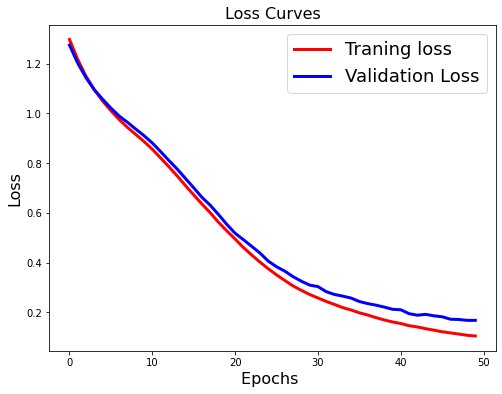

In [ ]:
loss_graph(history2)

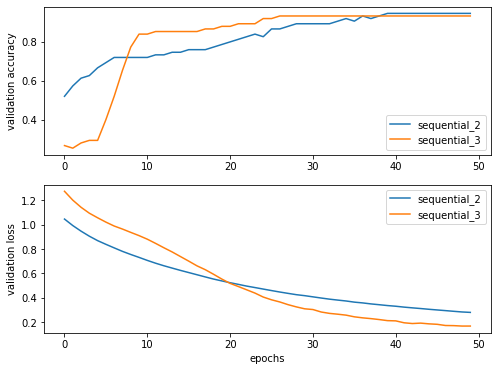

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (8,6))
for model_name in history_dict:
  val_acc = history_dict[model_name][0].history['val_accuracy']
  val_loss = history_dict[model_name][0].history['val_loss']
  ax1.plot(val_acc, label = model_name)
  ax2.plot(val_loss, label = model_name)

ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()